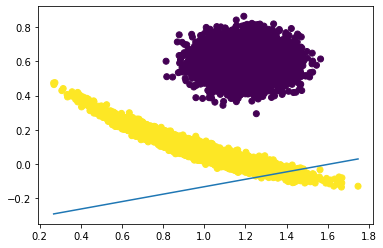

In [74]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(122)

# number of points per class
N = 10000

# first class
X1_1 = 2 * np.random.normal(loc=0.5, scale=0.1, size=N)
X2_1 = np.exp(-X1_1) + np.random.normal(loc=0, scale=0.02, size=N) - 0.3
Y1 = np.ones(N)

# second class
X1_2 = 2 * np.random.normal(loc=0.6, scale=0.05, size=N)
X2_2 = np.random.normal(loc=0.6, scale=0.07, size=N)
Y2 = -np.ones(N)

# weigths initialization
w = np.random.uniform(low=-0.1, high=0.1, size=3)

y = np.concatenate((Y1, Y2))
X0 = np.ones(y.shape[0])
X1 = np.concatenate((X1_1, X1_2))
X2 = np.concatenate((X2_1, X2_2))
X = np.stack((X0, X1, X2), axis=1)

plt.scatter(X[:, 1], X[:, 2], c=y)
plt.plot([np.min(X1), np.max(X1)], [np.min(X1) * (-w[1]/w[2]) -
         w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]])


In [75]:
def error_w(X, y, w):
    return 0.5 * np.sum(np.square(y - np.dot(X, w)))


error_w(X, y, w)


10287.250575792692

number of epochs = 1000
number of errors = 0.0


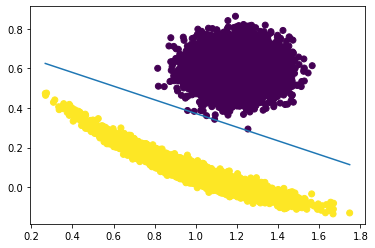

In [76]:
# re-initialize weights
w = np.random.uniform(low=-0.1, high=0.1, size=3)

# number of epochs
max_epochs = 1000

# batch size for mini-batch learning
batch_size = 10

# learning rate 0 < eta <= 1
eta = 1e-4

# error arrays
total_error = np.zeros(max_epochs + 1)
total_num_errors = np.zeros(max_epochs + 1)

for epoch in range(max_epochs):
    total_error[epoch] = error_w(X, y, w)
    total_num_errors[epoch] = sum(y * np.sign(np.dot(X, w)) < 0)

    rand_perm = np.random.permutation(y.shape[0])
    X = X[rand_perm, :]
    y = y[rand_perm]

    for j in range(0, y.shape[0], batch_size): # SGD
        x_batch = X[j:j + batch_size, :]
        y_batch = y[j:j + batch_size]

        errors = y_batch - np.dot(x_batch, w)
        w += eta * np.dot(np.transpose(x_batch), errors)

total_error[max_epochs] = error_w(X, y, w)
total_num_errors[max_epochs] = sum((y * np.sign(np.dot(X, w))) < 0)

print(f"number of epochs = {epoch + 1}")
print(f"number of errors = {total_num_errors[-1]}")
plt.scatter(X[:, 1], X[:, 2], c=y)
plt.plot([np.min(X1), np.max(X1)], [np.min(X1) * (-w[1]/w[2]) -
         w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]])


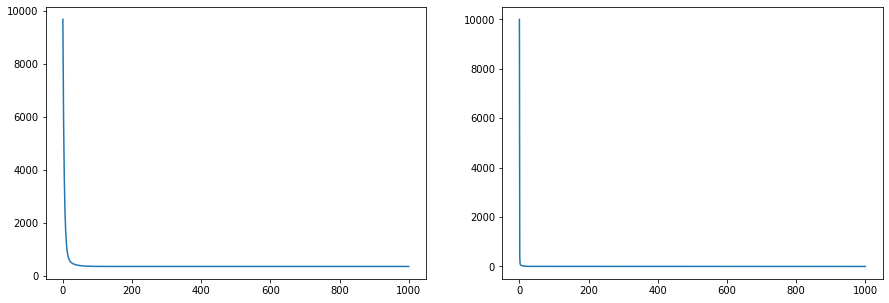

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
axs[0].plot(range(sum(total_error > 0)), total_error[total_error > 0])
axs[1].plot(range(sum(total_error > 0)), total_num_errors[total_error > 0])
